In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
columns = ['sepal length','sepal width','petal length','petal width','flower type']
dataFile = pd.read_csv("dataFile.csv",delimiter=',')
data = pd.DataFrame(np.array(dataFile),columns = columns)
data[0:70]

,sepal length,sepal width,petal length,petal width,flower type
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
65,5.6,3.0,4.5,1.5,Iris-versicolor
66,5.8,2.7,4.1,1.0,Iris-versicolor
67,6.2,2.2,4.5,1.5,Iris-versicolor
68,5.6,2.5,3.9,1.1,Iris-versicolor


In [104]:
def classify_flower_type(data):
    for i in range(len(data)):
        if 'setosa' in data['flower type'][i]:
            data['flower type'][i] = 1
        elif 'versicolor' in data['flower type'][i]:
            data['flower type'][i] = 2
        elif 'virginica' in data['flower type'][i]:
            data['flower type'][i] = 3
    
    return data

In [105]:
def train_test_data_split(df,n):    
    df = df.sample(frac=1)
    
    train_data = df[0:int(data.shape[0]*(1-0.2)+1)]
    test_data = df[int(data.shape[0]*(1-0.2)):]
    
    return train_data,test_data

In [106]:
data = classify_flower_type(data)
train_data,test_data = train_test_data_split(data,0.2)

In [107]:
print("test data lenght:",test_data.shape)
print("train data lenght:",train_data.shape)

test data lenght: (30, 5)
train data lenght: (120, 5)


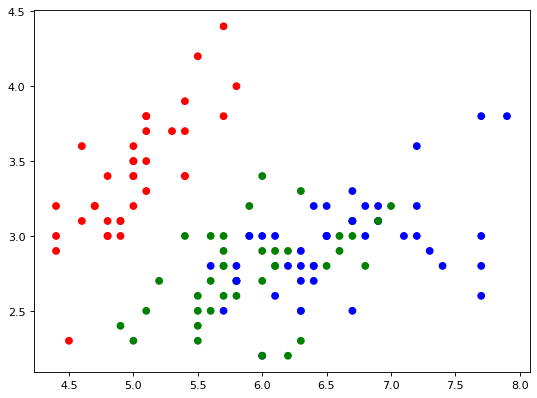

In [108]:
colors = {1:'red', 2:'green', 3:'blue'}
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(train_data['sepal length'], train_data['sepal width'], c=train_data['flower type'].map(colors))

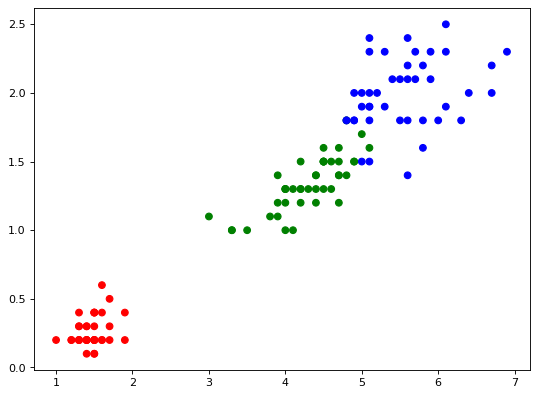

In [109]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(train_data['petal length'], train_data['petal width'], c=train_data['flower type'].map(colors))

In [96]:
def model(train_data,test_data,K):
    results = []
    for i in range(0,len(test_data)):
        temp = train_data
        temp['dist'] = ((test_data['sepal length'].iloc[i] - train_data['sepal length'])**2 + (test_data['sepal width'].iloc[i] - train_data['sepal width'])**2 + (test_data['petal length'].iloc[i] - train_data['petal length'])**2 + (test_data['petal width'].iloc[i] - train_data['petal width'])**2)**(1/2)
        temp = temp.sort_values("dist")
        results.append(temp[0:K]['flower type'].value_counts().idxmax())
    return results

In [111]:
k = 3
results = model(train_data,test_data,k)
print(results)

[3, 3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 2, 1, 1, 1, 3, 1, 1, 2, 2, 2, 1, 3, 1, 1, 1, 3, 1, 3, 2]


In [112]:
def find_accuracy(results,test_data):
    acc = 0
    for i in range(len(results)):
        if results[i] == test_data['flower type'].iloc[i]:
            acc += 1
        else:
            acc = acc
    return acc/len(results)*100

In [118]:
print('Model Accuracy:',find_accuracy(results,test_data)//1,"%")

96.0 %
